In [ ]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Python/Dataset/1. Regression - Module - (Housing Prices).csv')

In [ ]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [ ]:
df['Waterfront View'].value_counts()

No     21450
Yes      163
Name: Waterfront View, dtype: int64

In [ ]:
dummy_df=pd.get_dummies(df, columns=['Waterfront View'])
df = dummy_df

In [ ]:
df['Condition of the House'].value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [ ]:
df['Condition-of_the_House'] = df['Condition of the House'].map({'Bad':2,'Okay':4,'Excellent':6,'Good':8,'Fair':10})

In [ ]:
df = df.drop(columns=['ID','Date House was Sold','No of Times Visited','Latitude','Longitude','Condition of the House'], axis=1)

In [ ]:
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_No,Waterfront View_Yes,Condition-of_the_House
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,1340.0,5650,1,0,10
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,1690.0,7639,1,0,10
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,2720.0,8062,1,0,10
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,1360.0,5000,1,0,6
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,1800.0,7503,1,0,10


In [ ]:
df=df.fillna(0)

Scalling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

Y = df['Sale Price']
X = sc.fit_transform(df.drop(columns=['Sale Price']))
X = pd.DataFrame(data=X, columns=df.drop(columns=['Sale Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_No,Waterfront View_Yes,Condition-of_the_House
0,-0.398737,-1.446095,-0.978037,-0.228187,-0.915427,-0.564013,-0.734261,-0.658681,0.544898,-0.210128,0.156292,-0.943022,-0.260715,0.087173,-0.087173,0.656305
1,-0.398737,0.176047,0.534057,-0.189751,0.936506,-0.564013,0.461140,0.245141,0.681079,4.746678,0.077100,-0.432450,-0.187868,0.087173,-0.087173,0.656305
2,-1.473959,-1.446095,-1.424051,-0.123165,-0.915427,-1.468651,-1.229326,-0.658681,1.293892,-0.210128,-0.067836,1.070090,-0.172375,0.087173,-0.087173,0.656305
3,0.676485,1.149331,-0.129524,-0.243880,-0.915427,-0.564013,-0.891233,1.397515,0.204446,-0.210128,0.093536,-0.913846,-0.284522,0.087173,-0.087173,-2.263263
4,-0.398737,-0.148382,-0.434119,-0.169519,-0.915427,0.340626,-0.130523,-0.658681,-0.544548,-0.210128,0.000897,-0.271985,-0.192849,0.087173,-0.087173,0.656305


checking and removing multilinearity

In [ ]:
k=X.corr()
k

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_No,Waterfront View_Yes,Condition-of_the_House
No of Bedrooms,1.000000,0.515578,0.576094,0.031726,0.175429,0.349008,0.477441,0.303093,-0.154178,0.018841,-0.009500,0.391624,0.029244,0.006582,-0.006582,0.011726
No of Bathrooms,0.515578,1.000000,0.753161,0.087728,0.499972,0.635038,0.684262,0.283416,-0.505232,0.050823,-0.019733,0.567666,0.087216,-0.063754,0.063754,0.173354
Flat Area (in Sqft),0.576094,0.753161,1.000000,0.172661,0.353402,0.704885,0.874885,0.434765,-0.317199,0.055503,-0.016521,0.755197,0.183179,-0.103803,0.103803,0.101132
Lot Area (in Sqft),0.031726,0.087728,0.172661,1.000000,-0.005203,0.102295,0.183472,0.015251,-0.053085,0.007575,-0.008540,0.144503,0.718522,-0.021615,0.021615,-0.012978
No of Floors,0.175429,0.499972,0.353402,-0.005203,1.000000,0.461228,0.523729,-0.245705,-0.489319,0.006338,-0.004798,0.279688,-0.011269,-0.023698,0.023698,0.287341
Overall Grade,0.349008,0.635038,0.704885,0.102295,0.461228,1.000000,0.704680,0.145266,-0.456629,0.010440,-0.017166,0.681158,0.107581,-0.070333,0.070333,0.203542
Area of the House from Basement (in Sqft),0.477441,0.684262,0.874885,0.183472,0.523729,0.704680,1.000000,-0.051963,-0.423597,0.023357,-0.022269,0.731477,0.194094,-0.072097,0.072097,0.190296
Basement Area (in Sqft),0.303093,0.283416,0.434765,0.015251,-0.245705,0.145266,-0.051963,1.000000,0.133124,0.071323,0.007386,0.200418,0.017276,-0.080588,0.080588,-0.146216
Age of House (in Years),-0.154178,-0.505232,-0.317199,-0.053085,-0.489319,-0.456629,-0.423597,0.133124,1.000000,0.224874,0.012025,-0.325952,-0.070958,-0.026161,0.026161,-0.394560
Renovated Year,0.018841,0.050823,0.055503,0.007575,0.006338,0.010440,0.023357,0.071323,0.224874,1.000000,-0.027426,-0.002640,0.007854,-0.092885,0.092885,0.062574


<Axes: >

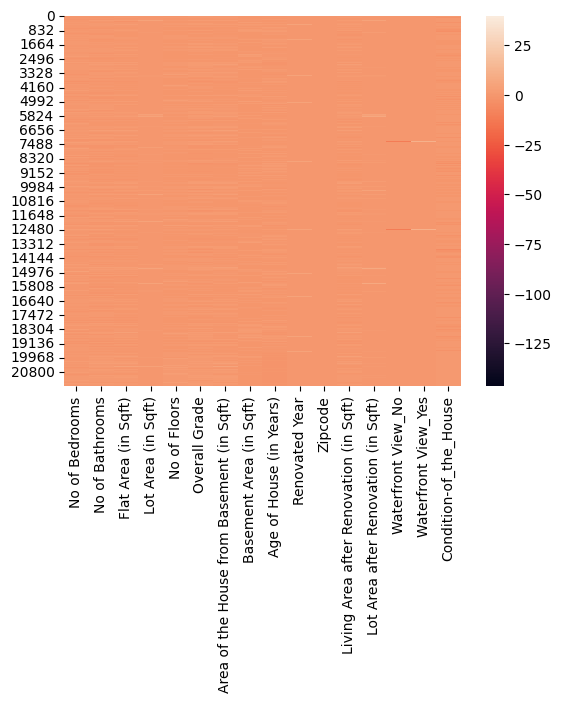

In [ ]:
sns.heatmap(X)

In [ ]:
[[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]

[['No of Bedrooms', 'No of Bathrooms'],
 ['No of Bedrooms', 'Flat Area (in Sqft)'],
 ['No of Bathrooms', 'No of Bedrooms'],
 ['No of Bathrooms', 'Flat Area (in Sqft)'],
 ['No of Bathrooms', 'Overall Grade'],
 ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
 ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
 ['Flat Area (in Sqft)', 'No of Bedrooms'],
 ['Flat Area (in Sqft)', 'No of Bathrooms'],
 ['Flat Area (in Sqft)', 'Overall Grade'],
 ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
 ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
 ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
 ['No of Floors', 'Area of the House from Basement (in Sqft)'],
 ['Overall Grade', 'No of Bathrooms'],
 ['Overall Grade', 'Flat Area (in Sqft)'],
 ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
 ['Overall Grade', 'Living Area after Renovation (in Sqft)'],
 ['Area of the House from Basement (in Sqft)', 'No of

# train test

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, xtest, Ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=101)
Xtrain.shape, xtest.shape, Ytrain.shape, ytest.shape

((15129, 16), (6484, 16), (15129,), (6484,))

# linear regration

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
lr.coef_

array([-50167.37990367,  37057.68470867,  36363.31153485,   2638.14083048,
        20107.73840038,  87628.30772831, 138184.19769328,  76520.59979373,
       102932.78770311,   4942.82670582,  71491.97441197,  36863.12925164,
       -17001.51330651, -29842.24291986,  29842.24291986, -11879.14552379])

In [143]:
predictions= lr.predict(xtest)

In [144]:
lr.score(xtest, ytest)

0.5067350231583353

In [147]:
residual = predictions - ytest

res_table = pd.DataFrame({'residual':residual,'predictions' : predictions, })
res_table= res_table.sort_values(by='predictions')

In [148]:
z=[i for i in range(int(res_table['predictions'].max()))]
k=[0 for i in range(int(res_table['predictions'].max()))]

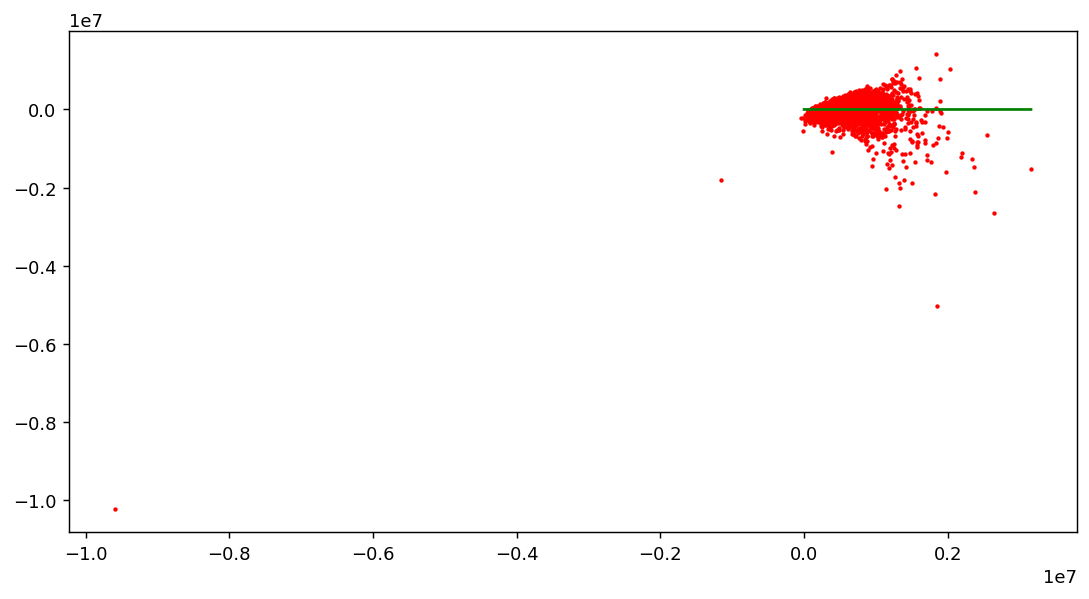

In [153]:
plt.figure(dpi=130, figsize=(10,5))

plt.scatter(res_table['predictions'],res_table['residual'], color='red', s=2)
#plt.plot(res_table['predictions'],res_table['residual'], color='black')
plt.plot(z,k,color='green')

(array([2.840e+02, 7.170e+02, 1.022e+03, 8.260e+02, 4.240e+02, 1.240e+02,
        2.700e+01, 1.000e+01, 3.000e+00, 1.000e+00]),
 array([   8.44547569,  126.53445939,  244.62344309,  362.71242678,
         480.80141048,  598.89039417,  716.97937787,  835.06836157,
         953.15734526, 1071.24632896, 1189.33531265]),
 <BarContainer object of 10 artists>)

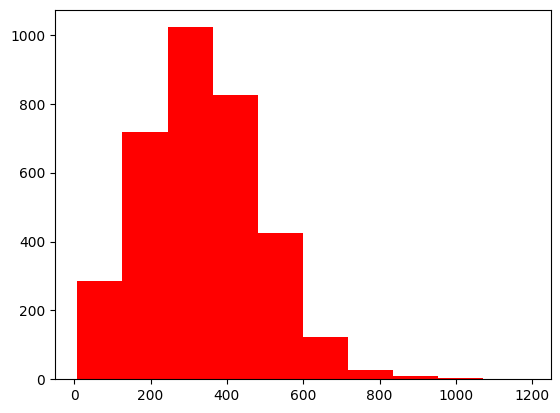

In [155]:
plt.hist((res_table['residual']**(1/2)), color='red')